# Inferential Statistics Practice 
Using Python to apply inferential statistics concepts including sampling distributions, confidence intervals, hypothesis testing, etc. 

## Confidence Intervals 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('../data/coffee_dataset.csv')
coffee_red = coffee_full.sample(200) 

In [2]:
# explore dataset
coffee_red.head()
coffee_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
user_id          200 non-null int64
age              200 non-null object
drinks_coffee    200 non-null bool
height           200 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
# proportion of coffee drinkers in sample
mean_drinker = coffee_red['drinks_coffee'].mean()
mean_non_drinker = 1 - mean_drinker

In [ ]:
# average height of coffee drinkers
drinks_height = coffee_red[coffee_red['drinks_coffee']]['height'].mean()
drinks_height

In [ ]:
# average height of non coffee drinkers
non_drinks_height = coffee_red[~coffee_red['drinks_coffee']]['height'].mean()
non_drinks_height

In [ ]:
# bootstrap sample of 200 draws
bootsamp = coffee_red.sample(200, replace=True)
bootsamp['drinks_coffee'].mean()

In [ ]:
# Bootstrap sample 10,000 times
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(mean)
    
plt.hist(boot_means)

In [ ]:
# Obtain 95% confidence interval 
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

## Confidence Interval - Difference in Means 

(array([  14.,  114.,  501., 1490., 2546., 2724., 1724.,  707.,  160.,
          20.]),
 array([-0.43427782, -0.08833209,  0.25761365,  0.60355939,  0.94950512,
         1.29545086,  1.6413966 ,  1.98734234,  2.33328807,  2.67923381,
         3.02517955]),
 <a list of 10 Patch objects>)

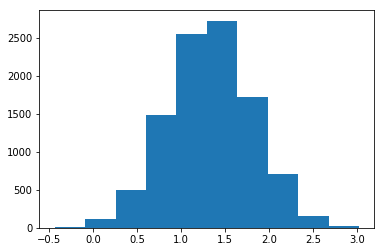

In [37]:
# Bootstrap sample for 10,000 iterations for coffee vs non-coffee drinkers
diff_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    coffee_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    non_coffee_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diff_means.append(coffee_mean - non_coffee_mean)

plt.hist(diff_means)

In [38]:
# 99% confidence interval for difference of means 
np.percentile(diff_means, 0.05), np.percentile(diff_means, 99.5)

(-0.2836706138241625, 2.5530565867329718)

(array([  11.,  123.,  564., 1603., 2822., 2651., 1577.,  562.,   80.,
           7.]),
 array([2.96109369, 3.21988727, 3.47868084, 3.73747441, 3.99626799,
        4.25506156, 4.51385513, 4.7726487 , 5.03144228, 5.29023585,
        5.54902942]),
 <a list of 10 Patch objects>)

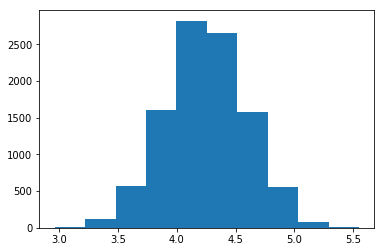

In [44]:
# Bootstrap sample for 10,000 iterations for older than 21 vs younger than 21 
diff_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    below21_mean = bootsamp[bootsamp['age'] == '<21' ]['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] == '>=21']['height'].mean()
    diff_means.append(over21_mean - below21_mean)

plt.hist(diff_means)

In [45]:
# 99% confidence interval for difference of means 
np.percentile(diff_means, 0.05), np.percentile(diff_means, 99.5)

(3.156627714400016, 5.095631312971563)

In [48]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0746837738663995, 2.5904387810384355)

Within the under 21 and over 21 groups, we see that on average non-coffee drinkers were taller.  But, when combined, we see that on average coffee drinkers were on average taller.  This is **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

## Hypothesis Testing

### Simulating from the Null Hypothesis

**1. Hypothesis to test whether the average height of coffee drinkers is same as non-coffee drinkers**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_0: \mu_{coff} - \mu_{no} \neq 0$$


$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.

** 2. Hypothesis to test whether the average height of coffee drinkers is less than non-coffee drinkers**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_0: \mu_{coff} - \mu_{no} < 0$$

$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('../data/coffee_dataset.csv')
sample_data = coffee_full.sample(200) 

In [16]:
nocoff_means, coff_means, diff_means = [],[],[]

# bootstrap sample data
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
       
    # append means    
    nocoff_means.append(nocoff_mean)
    coff_means.append(coff_mean)
    diff_means.append(coff_mean - nocoff_mean)

In [17]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.40216140520043336

In [18]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24445053750150642

In [19]:
np.std(diff_means) # the standard deviation for the sampling distribution for difference in means

0.46792316298656056

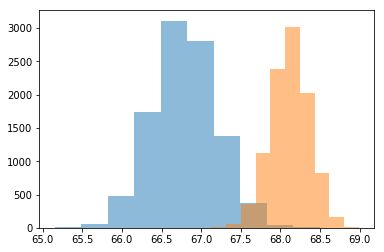

In [20]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); 

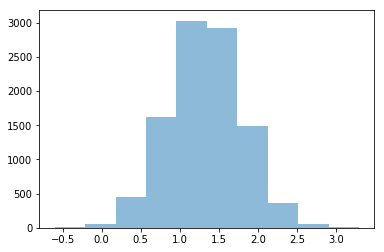

In [22]:
plt.hist(diff_means, alpha = 0.5);

All three sampling distributions of means appear normally distributed

**Simulation of sampling distribution if it were centred on zero using standard deviation of difference of means calculated earlier**

In [24]:
null_vals = np.random.normal(0, np.std(diff_means), 10000)

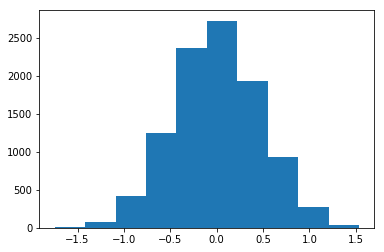

In [25]:
plt.hist(null_vals);

## Calculating Errors
Calculate overall, type 1 and type 2 errors 

In [26]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('../data/judicial_dataset_predictions.csv')
par_data = pd.read_csv('../data/parachute_dataset.csv')

In [27]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [28]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


In [42]:
# Proportion of errors in each dataset
#jud_error = 
jud_data[jud_data['actual'] != jud_data['predicted']].shape[0] / jud_data.shape[0] # Number of errors

307

In [7]:
jud_data.query("actual == 'innocent' and predicted == 'guilty'").count()[0]/jud_data.shape[0] # Type 1

0.001510366607167376

In [8]:
jud_data.query("actual == 'guilty' and predicted == 'innocent'").count()[0]/jud_data.shape[0] # Type 2

0.040642592338322119

#### Parachute dataset errors

In [10]:
par_data[par_data['actual'] != par_data['predicted']].shape[0]/par_data.shape[0] # Number of errros


0.039972551037913875

In [13]:
par_data.query("actual == 'fails' and predicted == 'opens'").count()[0]/par_data.shape[0] # Type 1


0.00017155601303825698

In [14]:
par_data.query("actual == 'opens' and predicted == 'fails'").count()[0]/par_data.shape[0] # Type 2


0.039800995024875621